In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_allnc_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_nocolor_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_allnc_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_nocolor_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_allnc_mm_cl= df_combined_allnc_mm.drop(columns=['label', 'filename'])
df_combined_allnc_z_cl= df_combined_allnc_z.drop(columns=['label', 'filename'])

In [4]:
bandwidth_estimate = estimate_bandwidth(df_combined_allnc_z_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate)

Estimated bandwidth: 2.590161693866167


In [7]:
bandwidth_values = [ 3.22, 3, 3.5,4, 2.59, 4.1]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_combined_allnc_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_combined_allnc_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 3.22 | Clusters: 3 | Silhouette Score: 0.453
Bandwidth: 3.00 | Clusters: 4 | Silhouette Score: 0.273
Bandwidth: 3.50 | Clusters: 3 | Silhouette Score: 0.468
Bandwidth: 4.00 | Clusters: 2 | Silhouette Score: 0.570
Bandwidth: 2.59 | Clusters: 6 | Silhouette Score: 0.185
Bandwidth: 4.10 | Clusters: 2 | Silhouette Score: 0.570


In [8]:
bandwidth = 4 #bandwidth_estimate
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_combined_allnc_z_cl.values)
labels = ms.labels_
n_clusters = len(np.unique(labels))
print(f"Clusters: {n_clusters}")

Clusters: 2


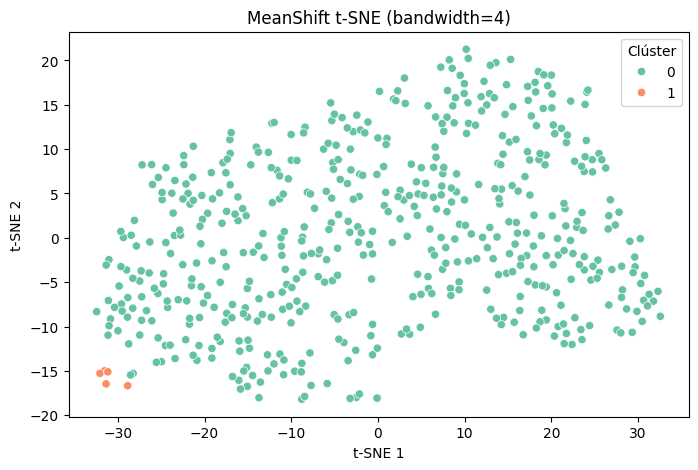

In [9]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_allnc_z_cl.values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set2')
plt.title(f'MeanShift t-SNE (bandwidth={bandwidth})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Clúster')
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


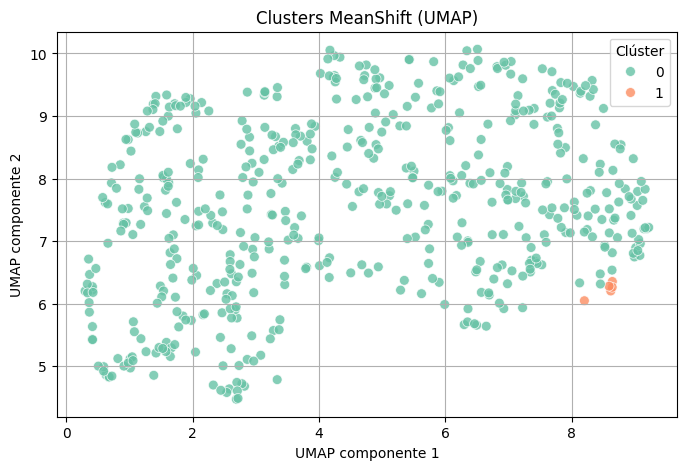

In [10]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_z = reducer.fit_transform(df_combined_allnc_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_z[:, 0],
    y=X_umap_z[:, 1],
    hue=labels,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [11]:
score_z = silhouette_score(df_combined_allnc_z_cl, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.570


In [12]:
# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({

    'label': df_combined_allnc_z['label'],
    'cluster': labels
})

# Tabla de contingencia: comparación entre etiquetas originales y clústeres
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print("Tabla de contingencia entre etiquetas originales y clústeres:")
print(tabla_contingencia)


Tabla de contingencia entre etiquetas originales y clústeres:
cluster    0  1
label          
higher   268  0
smaller  264  5


In [11]:
#no sale equilibrado, todo en un cluster da igual cuantos clusteres haya

In [13]:
bandwidth_estimate_mm = estimate_bandwidth(df_combined_allnc_mm_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate_mm)

Estimated bandwidth: 0.40274931871604797


In [17]:
bandwidth_values = [0.58, 0.53, 0.55, 0.521, 0.532, 0.40, 0.38, 0.6]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_combined_allnc_mm_cl.values)
    labels_mm = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels_mm))
    
    if n_clusters_mm > 1:
        score = silhouette_score(df_combined_allnc_mm_cl.values, labels_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.58 | Clusters: 2 | Silhouette Score: 0.482
Bandwidth: 0.53 | Clusters: 3 | Silhouette Score: 0.362
Bandwidth: 0.55 | Clusters: 3 | Silhouette Score: 0.365
Bandwidth: 0.52 | Clusters: 3 | Silhouette Score: 0.362
Bandwidth: 0.53 | Clusters: 3 | Silhouette Score: 0.362
Bandwidth: 0.40 | Clusters: 4 | Silhouette Score: 0.280
Bandwidth: 0.38 | Clusters: 8 | Silhouette Score: 0.148
Bandwidth: 0.60 | Clusters: 2 | Silhouette Score: 0.482


In [29]:
bandwidth = 0.58
meanshift_mm = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_mm.fit(df_combined_allnc_mm_cl.values)
labels_mm = meanshift_mm.labels_  

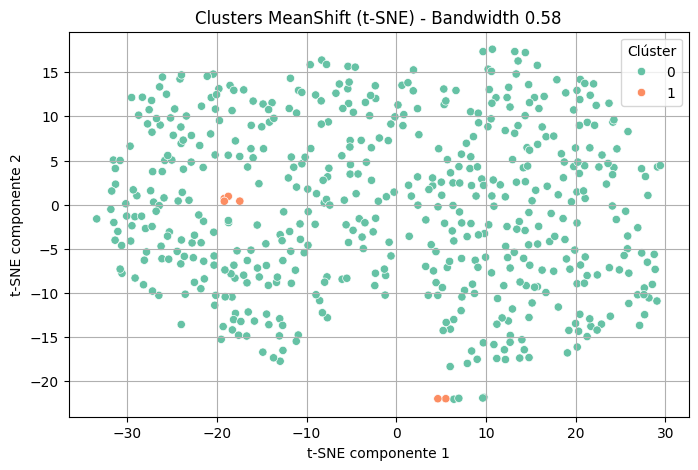

In [30]:

tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_combined_allnc_mm_cl.values)

# Gráfico
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=labels_mm, palette='Set2')
plt.title(f'Clusters MeanShift (t-SNE) - Bandwidth {bandwidth}')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


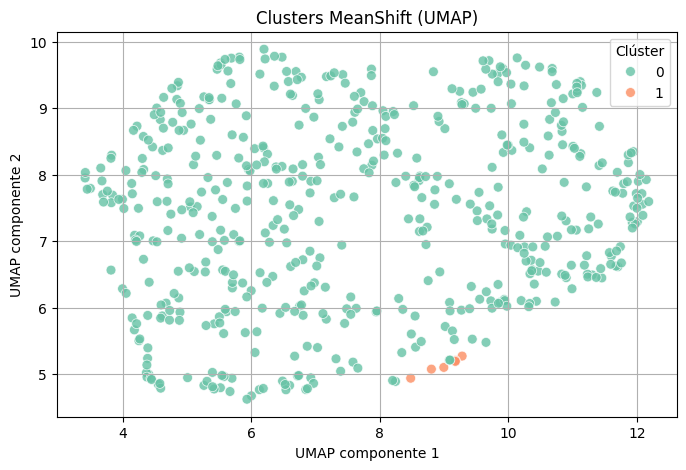

In [31]:
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap_mm = reducer.fit_transform(df_combined_allnc_mm_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_mm[:, 0],
    y=X_umap_mm[:, 1],
    hue=labels_mm,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [25]:
score_mm = silhouette_score(df_combined_allnc_mm_cl, labels_mm)
print(f"Silhouette Score: {score_mm:.3f}")

Silhouette Score: 0.482


In [32]:
df_resultado = pd.DataFrame({
    'label': df_combined_allnc_mm['label'],
    'cluster': labels_mm
})

tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print(tabla_contingencia)


cluster    0  1
label          
higher   268  0
smaller  263  6


se hace reduccion de la dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_12764\635394187.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


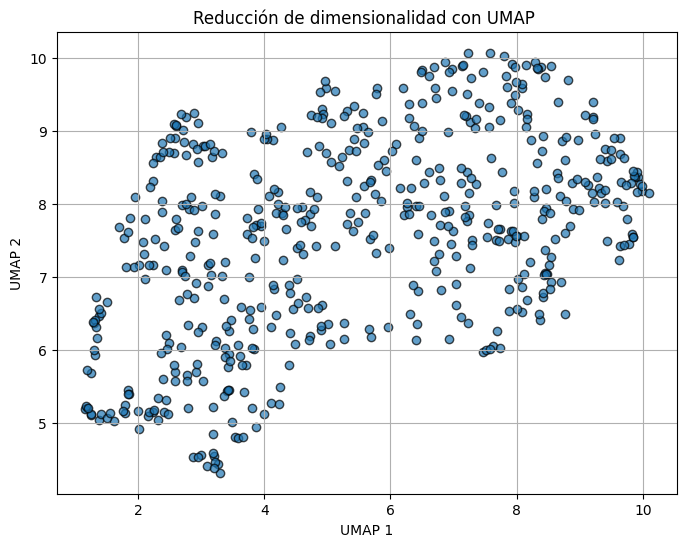

In [35]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=20,n_components=2, random_state=42) 
X_umap_z = umap_model_z.fit_transform(df_combined_allnc_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [36]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_z, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_z)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 1.764 | Clusters: 3 | Silhouette Score: 0.373


In [38]:
bandwidth_values = [2.22, 2, 2.5,2.52, 2.6, 1.63, 1.8]

for bw in bandwidth_values:
    ms_z = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_z.fit(X_umap_z)
    labels_z = ms_z.labels_
    n_clusters_z = len(np.unique(labels_z))
    
    if n_clusters_z> 1:
        score = silhouette_score(X_umap_z, labels_z)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.22 | Clusters: 2 | Silhouette Score: 0.533
Bandwidth: 2.00 | Clusters: 2 | Silhouette Score: 0.380
Bandwidth: 2.50 | Clusters: 2 | Silhouette Score: 0.534
Bandwidth: 2.52 | Clusters: 2 | Silhouette Score: 0.535
Bandwidth: 2.60 | Clusters: 2 | Silhouette Score: 0.528
Bandwidth: 1.63 | Clusters: 2 | Silhouette Score: 0.321
Bandwidth: 1.80 | Clusters: 2 | Silhouette Score: 0.377


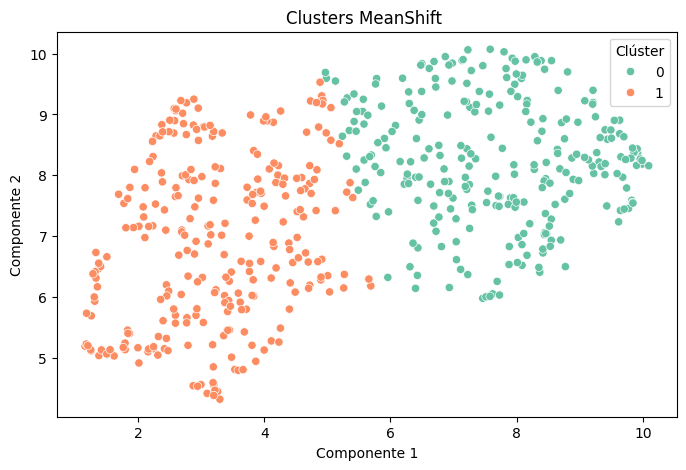

        filename    label  cluster
0    callo_1.png  smaller        1
1   callo_10.png  smaller        1
2  callo_100.png  smaller        0
3  callo_101.png  smaller        0
4  callo_102.png  smaller        0


In [78]:
bandwidth_def = 2.52
meanshift_z = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_z.fit(X_umap_z) 
labels_umap = meanshift_z.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_allnc_z['filename'],
    'label': df_combined_allnc_z['label'],
    'cluster': labels_umap  # Usamos las etiquetas generadas en la última ejecución
})

# Mostrar primeras filas
print(df_resultado.head())

In [79]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])

# Mostrar la tabla
print(tabla_contingencia)


cluster    0    1
label            
higher    50  218
smaller  216   53


min-max

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_12764\3118372011.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


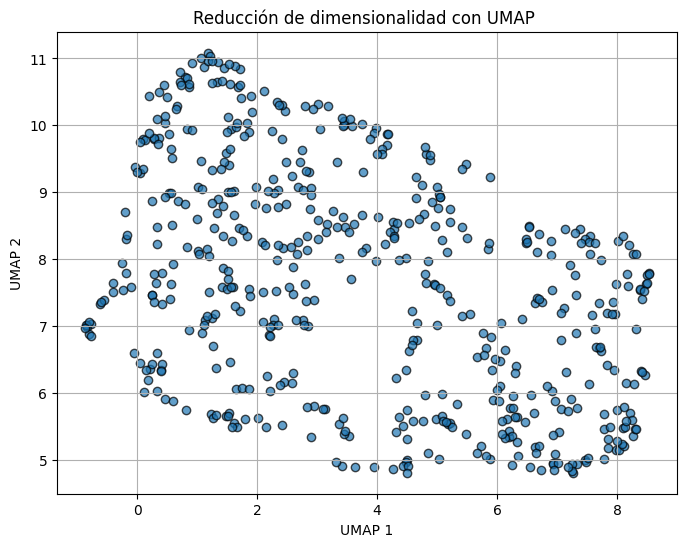

In [55]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=10,n_components=2, random_state=42) 
X_umap_mm = umap_model_mm.fit_transform(df_combined_allnc_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [56]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_mm, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_mm)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_mm, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.029 | Clusters: 3 | Silhouette Score: 0.376


In [57]:
bandwidth_values = [2.22, 2, 2.5,2.52, 2.6, 2.391, 2.21, 2.19, 2.56, 2.58, 2.7]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(X_umap_mm)
    labels_mm = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels_mm))
    
    if n_clusters_mm > 1:
        score = silhouette_score(X_umap_z, labels_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.22 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.00 | Clusters: 3 | Silhouette Score: 0.344
Bandwidth: 2.50 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.52 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.60 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.39 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.21 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.19 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.56 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.58 | Clusters: 2 | Silhouette Score: 0.500
Bandwidth: 2.70 | Clusters: 2 | Silhouette Score: 0.500


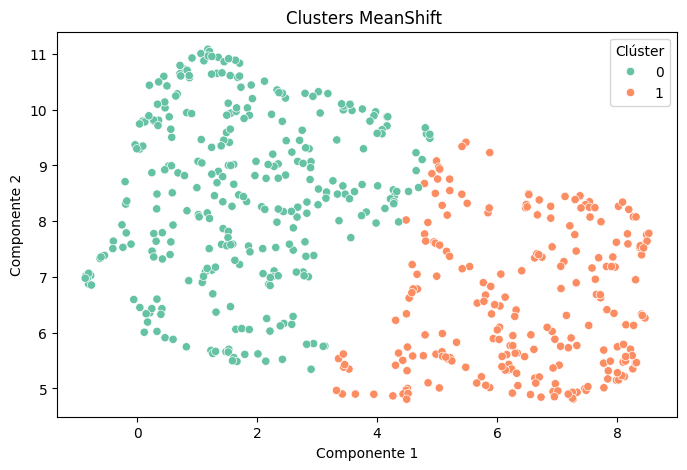

        filename    label  cluster
0    callo_1.png  smaller        0
1   callo_10.png  smaller        0
2  callo_100.png  smaller        1
3  callo_101.png  smaller        1
4  callo_102.png  smaller        1


In [74]:
bandwidth_def = 2.22
meanshift_mm = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_mm.fit(X_umap_mm) 
labels_umap = meanshift_mm.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_allnc_mm['filename'],
    'label': df_combined_allnc_mm['label'],
    'cluster': labels_umap 
})

# Mostrar primeras filas
print(df_resultado.head())

In [75]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])

# Mostrar la tabla
print(tabla_contingencia)

cluster    0    1
label            
higher   239   29
smaller   68  201


Min-max:
Con tres clusteres tengo uno en el que hay más higher, en otro más smaller y en el otro mezcla. 
Pero en el caso donde se hace este mismo clustering con características de color, salen dos clusteres con más imágenes higher (50.73% y 47%) y un tercer cluster ocn más imágenes smaller (70.26%).
Cuando con carcacterísticas de color ajusto para dos clusteres: el 73.23% de las imágenes smaller están en un cluster y el 97.38% de las higher están en otro cluster.
Sin caracter´siticas de color: 89.17% higher en cluster 0 y 74.72% de imágenes smaller en cluster 1.

Diferencias con color y sin color: Sin color aunque haya tres clusteres en uno va a haber más smaller y en otro más higher. Pero cuando se tienen en cuenta las características de color y se establecen tres clusteres, dos de ellos están formados por imágenes higher en su mayoría, mientras que en uno solo se concentrarían las smaller. Por tanto, hay algo en las carcater´siticas de color que permite hacer una distinción ente imágenes higher.

Z-score:

-Sin tener en cuenta las cacacterísticas de color: 
Se puede obtener dos clusteres donde: El clsuter 1 contendrá al 81.34% de las imágenes etiquetadas como higher, mientras que el cluster 0contendrá al 80.29% de las imágenes etiquetadas como smaller. 
Cuando se ajusta el bandwith para obtener tres clusteres, en uno se concentran la mayor parte de las imágenes smaller (cluster 0) y en el cluster 1 se concnetran la mayor parte de ls imágenes higher. En el tercer cluster hay una mezcla, aunque más predominante las imágenes higher.
(Tiene mejor equilibrio 2 clusteres)

-Teniendo en cuenta las características de color:
Si se establecen 3 clusteres: En dos de ellos habrá más imágenes higher y en otro cluster habrá más imágenes smaller.
Si se establecen dos clusteres: se obtiene que en uno de ellos están el 95.9% de las imágenes higher , y en otro cluster el 73.60% de las imágenes stiquetadas como smaller.

Por tanto, en este caso las características de color permiten formar dos clusteres con imágenes higher diferentes.

